# 参数估计 & 非参数估计
- 姓名：曹维伦
- 学号：2010699
- 专业：信息安全

## 基本要求：
生成两个各包含 N=1200 个二维随机向量的数据集合 $X_1$ 和 $X_2$，数据集合中随机向量来自于三个分布模型，分别满足均值向量 $\mu_1=[1,4]$,$\mu_2=[4,1]$, $\mu_3=[8,4]$ 和协方差矩阵 $D_1=D_2=D_3=2\pmb{I}$ ，其中$\pmb{I}$是 $2*2$的单位矩阵。在生成数据集合 $X_1$ 时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合 $X_2$ 时，先验概率如下：$p(w_1)=0.6$, $p(w_2)=0.1$, $p(w_3)=0.3$

1. 在两个数据集合上分别应用“似然率测试规则” 、“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果
2. 在两个数据集合上分别应用 $h=1$ 时的方窗核函数或高斯核函数估计方法，应用“似然率测试规则”进行分类实验，计算分类错误率，分析实验结果

### 导入需要的包

In [26]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

### 生成数据集

In [27]:
# 生成正态分布数据
def Generate_Sample_Gaussian(mean, cov, P, label):
    '''
        mean 为均值向量
        cov 为方差矩阵a
        P 为单个类的先验概率
        return 单个类的数据集
    '''
    temp_num = round(1200 * P)
    x, y = np.random.multivariate_normal(mean, cov, temp_num).T
    z = np.ones(temp_num) * label
    X = np.array([x, y, z])
    return X.T

def Generate_DataSet_plot(mean, cov, P):
    # 画出不同先验对应的散点图
    xx = []
    label = 1
    for i in range(3):
        xx.append(Generate_Sample_Gaussian(mean[i], cov, P[i], label))
        label += 1
        i = i + 1
    # 画图
    plt.figure(figsize=(4, 3))
    for i in range(3):
        plt.plot(xx[i][:, 0], xx[i][:, 1], '.', markersize=3.)
        plt.plot(mean[i][0], mean[i][1], 'r*')
    plt.show()
    return xx

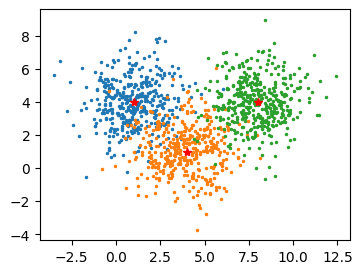

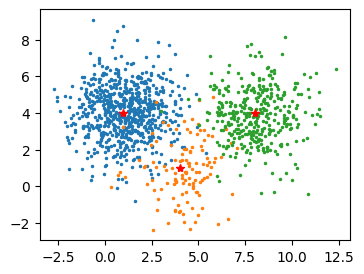

In [28]:
mean = np.array([[1, 4],
                 [4, 1],
                 [8, 4]])  # 均值数组
cov = [[2, 0],
       [0, 2]]  # 方差矩阵
num = 1200  # 样本个数
P1 = [1 / 3, 1 / 3, 1 / 3]  # 样本X1的先验概率
P2 = [0.6, 0.1, 0.3]  # 样本X2的先验概率
X1 = np.array(Generate_DataSet_plot(mean, cov, P1), dtype=object)
X2 = np.array(Generate_DataSet_plot(mean, cov, P2), dtype=object)
X1 = np.vstack(X1)
X2 = np.vstack(X2)

In [29]:
X1.shape, X2.shape  # 前两列是坐标，最后一列是标签

((1200, 3), (1200, 3))

将数据依照标签分为三类，分别计算其平均值及标准差。

In [30]:
X1_1 = []
X1_2 = []
X1_3 = []
for i in range(1200):
    if(X1[i][2] == 1):
        X1_1.append(X1[i])
    elif(X1[i][2] == 2):
        X1_2.append(X1[i])
    else:
        X1_3.append(X1[i])

X1_1 = np.array(X1_1)
x1_1 = X1_1[:,[0]]
y1_1 = X1_1[:,[1]]

mu_x1_1 = np.sum(x1_1, axis = 0)/(num/3)
std_x1_1 = np.std(x1_1)
mu_x1_1 = mu_x1_1[0]
mu_y1_1 = np.sum(y1_1, axis = 0)/(num/3)
std_y1_1 = np.std(y1_1)
mu_y1_1 = mu_y1_1[0]

X1_2 = np.array(X1_2)
x1_2 = X1_2[:,[0]]
y1_2 = X1_2[:,[1]]

mu_x1_2 = np.sum(x1_2, axis = 0)/(num/3)
std_x1_2 = np.std(x1_2)
mu_x1_2 = mu_x1_2[0]
mu_y1_2 = np.sum(y1_2, axis = 0)/(num/3)
std_y1_2 = np.std(y1_2)
mu_y1_2 = mu_y1_2[0]

X1_3 = np.array(X1_3)
x1_3 = X1_3[:,[0]]
y1_3 = X1_3[:,[1]]

mu_x1_3 = np.sum(x1_3, axis = 0)/(num/3)
std_x1_3 = np.std(x1_3)
mu_x1_3 = mu_x1_3[0]
mu_y1_3 = np.sum(y1_3, axis = 0)/(num/3)
std_y1_3 = np.std(y1_3)
mu_y1_3 = mu_y1_3[0]

X2同理

In [52]:
X2_1 = []
X2_2 = []
X2_3 = []
j = 0
k = 0
h = 0
for i in range(1200):
    if(X2[i][2] == 1):
        X2_1.append(X2[i])
        j += 1
    elif(X2[i][2] == 2):
        X2_2.append(X2[i])
        k += 1
    else:
        X2_3.append(X2[i])
        h += 1
        
X2_1 = np.array(X2_1)
x2_1 = X2_1[:,[0]]
y2_1 = X2_1[:,[1]]

mu_x2_1 = np.sum(x2_1, axis = 0)/j
std_x2_1 = np.std(x2_1)
mu_x2_1 = mu_x2_1[0]
mu_y2_1 = np.sum(y2_1, axis = 0)/j
std_y2_1 = np.std(y2_1)
mu_y2_1 = mu_y2_1[0]

X2_2 = np.array(X2_2)
x2_2 = X2_2[:,[0]]
y2_2 = X2_2[:,[1]]

mu_x2_2 = np.sum(x2_2, axis = 0)/k
std_x2_2 = np.std(x2_2)
mu_x2_2 = mu_x2_2[0]
mu_y2_2 = np.sum(y2_2, axis = 0)/k
std_y2_2 = np.std(y2_2)
mu_y2_2 = mu_y2_2[0]

X2_3 = np.array(X2_3)
x2_3 = X2_3[:,[0]]
y2_3 = X2_3[:,[1]]

mu_x2_3 = np.sum(x2_3, axis = 0)/h
std_x2_3 = np.std(x2_3)
mu_x2_3 = mu_x2_3[0]
mu_y2_3 = np.sum(y2_3, axis = 0)/h
std_y2_3 = np.std(y2_3)
mu_y2_3 = mu_y2_3[0]

二维正态随机分布概率密度公式转化

In [32]:
def normal_p(x, y, mu_x, mu_y, std_x, std_y):
    tmp = 1 / (2 * math.pi * std_x * std_y)
    tmp1 = -0.5 * (((x - mu_x) ** 2 / std_x ** 2) + ((y - mu_y) ** 2 / std_y ** 2))
    z =  tmp * np.exp(tmp1)
    return z

使用最大似然估计分类并计算准确率

In [33]:
mleAcc_1 = 0
for i in range(num):
    p1 = normal_p(X1[i][0], X1[i][1], mu_x1_1, mu_y1_1, std_x1_1, std_y1_1)
    p2 = normal_p(X1[i][0], X1[i][1], mu_x1_2, mu_y1_2, std_x1_2, std_y1_2)
    p3 = normal_p(X1[i][0], X1[i][1], mu_x1_3, mu_y1_3, std_x1_3, std_y1_3)
    if(p1 > p2 and p1 > p3):
        if(1 == X1[i][2]):
            mleAcc_1 += 1
    elif(p2 > p1 and p2 > p3):
        if(2 == X1[i][2]):
            mleAcc_1 += 1
    elif(3 == X1[i][2]):
        mleAcc_1 += 1
mleAcc_1 /= num
mleAcc_1

0.9266666666666666

In [34]:
mleAcc_2 = 0
for i in range(num):
    p1 = normal_p(X2[i][0], X2[i][1], mu_x2_1, mu_y2_1, std_x2_1, std_y2_1)
    p2 = normal_p(X2[i][0], X2[i][1], mu_x2_2, mu_y2_2, std_x2_2, std_y2_2)
    p3 = normal_p(X2[i][0], X2[i][1], mu_x2_3, mu_y2_3, std_x2_3, std_y2_3)
    if(p1 > p2 and p1 > p3):
        if(1 == X2[i][2]):
            mleAcc_2 += 1
    elif(p2 > p1 and p2 > p3):
        if(2 == X2[i][2]):
            mleAcc_2 += 1
    elif(3 == X2[i][2]):
        mleAcc_2 += 1
mleAcc_2 /= num
mleAcc_2

0.9483333333333334

使用最大后验概率估计分类并计算准确率

In [35]:
mapAcc_1 = 0
for i in range(num):
    p1 = normal_p(X1[i][0], X1[i][1], mu_x1_1, mu_y1_1, std_x1_1, std_y1_1) * 1/3 
    p2 = normal_p(X1[i][0], X1[i][1], mu_x1_2, mu_y1_2, std_x1_2, std_y1_2) * 1/3 
    p3 = normal_p(X1[i][0], X1[i][1], mu_x1_3, mu_y1_3, std_x1_3, std_y1_3) * 1/3 
    if(p1 > p2 and p1 > p3):
        if(1 == X1[i][2]):
            mapAcc_1 += 1
    elif(p2 > p1 and p2 > p3):
        if(2 == X1[i][2]):
            mapAcc_1 += 1
    elif(3 == X1[i][2]):
        mapAcc_1 += 1
mapAcc_1 /= num
mapAcc_1

0.9266666666666666

In [36]:
mapAcc_2 = 0
for i in range(num):
    p1 = normal_p(X2[i][0], X2[i][1], mu_x2_1, mu_y2_1, std_x2_1, std_y2_1) * 0.6
    p2 = normal_p(X2[i][0], X2[i][1], mu_x2_2, mu_y2_2, std_x2_2, std_y2_2) * 0.1
    p3 = normal_p(X2[i][0], X2[i][1], mu_x2_3, mu_y2_3, std_x2_3, std_y2_3) * 0.3
    if(p1 > p2 and p1 > p3):
        if(1 == X2[i][2]):
            mapAcc_2 += 1
    elif(p2 > p1 and p2 > p3):
        if(2 == X2[i][2]):
            mapAcc_2 += 1
    elif(3 == X2[i][2]):
        mapAcc_2 += 1
mapAcc_2 /= num
mapAcc_2

0.9608333333333333

### 结果分析:
因为X1的三个先验概率相同，因此同一个数据使用MLE与MAP的分类结果并无不同。  
而X2的先验概率不同，因此两种估计方式结果不同，此例中使用最大后验估计效果更好

In [37]:
def kernel(u):
    if(abs(u) <= 0.5):
        return 1
    else:
        return 0

In [38]:
def kernel_p(x, X, h):
    tmp = 0
    for i in range(X.shape[0]):
        tmp += (1/h ** 2) * kernel((x - X[i][0]) / h)
    tmp /= num
    return tmp

In [39]:
kerAcc_1 = 0
for i in range(num):
    p1 = kernel_p(X1[i][0], x1_1, 1) * kernel_p(X1[i][1], y1_1, 1)
    p2 = kernel_p(X1[i][0], x1_2, 1) * kernel_p(X1[i][1], y1_2, 1)
    p3 = kernel_p(X1[i][0], x1_3, 1) * kernel_p(X1[i][1], y1_3, 1)
    
    if(p1 > p2 and p1 > p3):
        if(1 == X1[i][2]):
            kerAcc_1 += 1
    elif(p2 > p1 and p2 > p3):
        if(2 == X1[i][2]):
            kerAcc_1 += 1
    elif(3 == X1[i][2]):
        kerAcc_1 += 1
kerAcc_1 /= num
kerAcc_1

0.9308333333333333

In [40]:
kerAcc_2 = 0
for i in range(num):
    p1 = kernel_p(X2[i][0], x2_1, 1) * kernel_p(X2[i][1], y2_1, 1)
    p2 = kernel_p(X2[i][0], x2_2, 1) * kernel_p(X2[i][1], y2_2, 1)
    p3 = kernel_p(X2[i][0], x2_3, 1) * kernel_p(X2[i][1], y2_3, 1)
    
    if(p1 > p2 and p1 > p3):
        if(1 == X2[i][2]):
            kerAcc_2 += 1
    elif(p2 > p1 and p2 > p3):
        if(2 == X2[i][2]):
            kerAcc_2 += 1
    elif(3 == X2[i][2]):
        kerAcc_2 += 1
kerAcc_2 /= num
kerAcc_2

0.9558333333333333

我使用方窗函数估计，计算方法与前面类似，将x坐标的p(x)和y坐标的p(x)算出来相乘接着哪个概率大就取哪个。

## 中级要求：
根据初级要求中使用的一个核函数，在数据集 $X_2$上应用交叉验证法，在 $h \in [0.1, 0.5, 1, 1.5, 2] $ 中寻找最优的h值。

In [41]:
oneOut = math.ceil(X2.shape[0] * 0.2)
flag = 0
testPart = flag + oneOut
X_train = np.append(X2[:flag][:], X2[testPart:][:], axis = 0)
X_test = X2[flag:testPart]
X_train.shape

(960, 3)

In [42]:
oneOut = math.ceil(X2.shape[0] * 0.2)
for h in [0.1,0.5,1,1.5,2]:
    flag = 0
    acc = 0
    for j in range(5):
        kerAcc_3 = 0
        testPart = flag + oneOut
        X_train = np.append(X2[:flag][:], X2[testPart:][:], axis=0)
        X_test = X2[flag:testPart]
        for i in range(X_train.shape[0]):
            p1 = kernel_p(X_train[i][0], x2_1, h) * kernel_p(X_train[i][1], y2_1, h)
            p2 = kernel_p(X_train[i][0], x2_2, h) * kernel_p(X_train[i][1], y2_2, h)
            p3 = kernel_p(X_train[i][0], x2_3, h) * kernel_p(X_train[i][1], y2_3, h)

            if (p1 > p2 and p1 > p3):
                if (1 == X_train[i][2]):
                    kerAcc_3 += 1
            elif (p2 > p1 and p2 > p3):
                if (2 == X_train[i][2]):
                    kerAcc_3 += 1
            elif (3 == X_train[i][2]):
                kerAcc_3 += 1
        kerAcc_3 /= X_train.shape[0]
        acc += kerAcc_3
        print('训练集：h={0}時第{1}折，共測試{2}個，準確率為{3}'.format(h, j + 1, X_train.shape[0], kerAcc_3))
        kerAcc_3 = 0
        for i in range(X_test.shape[0]):
            p1 = kernel_p(X_test[i][0], x2_1, h) * kernel_p(X_test[i][1], y2_1, h)
            p2 = kernel_p(X_test[i][0], x2_2, h) * kernel_p(X_test[i][1], y2_2, h)
            p3 = kernel_p(X_test[i][0], x2_3, h) * kernel_p(X_test[i][1], y2_3, h)

            if (p1 > p2 and p1 > p3):
                if (1 == X_test[i][2]):
                    kerAcc_3 += 1
            elif (p2 > p1 and p2 > p3):
                if (2 == X_test[i][2]):
                    kerAcc_3 += 1
            elif (3 == X_test[i][2]):
                kerAcc_3 += 1
        kerAcc_3 /= X_test.shape[0]
        print('测试集：h={0}時第{1}折，共測試{2}個，準確率為{3}'.format(h, j + 1, X_test.shape[0], kerAcc_3))
        acc += kerAcc_3
        flag += oneOut
    acc /= 10
    print('h={0}时平均准确率为{1}'.format(h, acc))

训练集：h=0.1時第1折，共測試960個，準確率為0.9614583333333333
测试集：h=0.1時第1折，共測試240個，準確率為1.0
训练集：h=0.1時第2折，共測試960個，準確率為0.9614583333333333
测试集：h=0.1時第2折，共測試240個，準確率為1.0
训练集：h=0.1時第3折，共測試960個，準確率為0.9614583333333333
测试集：h=0.1時第3折，共測試240個，準確率為1.0
训练集：h=0.1時第4折，共測試960個，準確率為0.9989583333333333
测试集：h=0.1時第4折，共測試240個，準確率為0.85
训练集：h=0.1時第5折，共測試960個，準確率為0.9625
测试集：h=0.1時第5折，共測試240個，準確率為0.9958333333333333
h=0.1时平均准确率为0.9691666666666666
训练集：h=0.5時第1折，共測試960個，準確率為0.9510416666666667
测试集：h=0.5時第1折，共測試240個，準確率為1.0
训练集：h=0.5時第2折，共測試960個，準確率為0.9510416666666667
测试集：h=0.5時第2折，共測試240個，準確率為1.0
训练集：h=0.5時第3折，共測試960個，準確率為0.9520833333333333
测试集：h=0.5時第3折，共測試240個，準確率為0.9958333333333333
训练集：h=0.5時第4折，共測試960個，準確率為0.9958333333333333
测试集：h=0.5時第4折，共測試240個，準確率為0.8208333333333333
训练集：h=0.5時第5折，共測試960個，準確率為0.9541666666666667
测试集：h=0.5時第5折，共測試240個，準確率為0.9875
h=0.5时平均准确率为0.9608333333333337
训练集：h=1時第1折，共測試960個，準確率為0.9458333333333333
测试集：h=1時第1折，共測試240個，準確率為0.9958333333333333
训练集：h=1時第2折，共測試960個，準確率為0.9447916666666667
测试集：h=1時第2折，共測試240個，準確

少数测试集因为样本过少因此可能出现准确率为1的极端状况，结果显示h取0.1时效果最好

## 高级要求：
任选一个数据集，在该数据集上应用k-近邻概率密度估计，任选3个k值输出概率密度分布图。

In [43]:
def K_near(x, y, X, k):
    dist = []
    for i in range(X.shape[0]):
        d = math.sqrt(pow(x - X[i][0], 2) + pow(y - X[i][1], 2))
        dist.append(d)
    dist = np.argsort(dist)
    tmp = []
    for i in range(k):
        tmp.append(dist[i])
    return tmp

In [44]:
def getP(k, n, V):
    p = k / (n * V)
    return p

In [45]:
def Kneibor_Eval(X, k):
    Xtrain = np.array(X)
    # 生成200*200=40000个采样点，每个采样点对应三类的不同概率
    p = np.zeros((200, 200, 3))
    # 在[-5,15]的范围内，以0.1为步长估计概率密度
    for i in np.arange(0, 200):
        for j in np.arange(0, 200):
            x=0.1*(i-50)
            y=0.1*(j-50)
            k_near = K_near(x, y, Xtrain, k)
            r = math.sqrt(pow(x - Xtrain[k_near[k - 1]][0], 2) + pow(y - Xtrain[k_near[k - 1]][1], 2))
            V = math.pi * r ** 2
            k1 = 0
            k2 = 0
            k3 = 0
            for t in k_near:
                if (Xtrain[t][2] == 1):
                    k1 += 1
                elif (Xtrain[t][2] == 2):
                    k2 += 1
                elif (Xtrain[t][2] == 3):
                    k3 += 1
            p1 = 0
            p2 = 0
            p3 = 0
            for t in k_near:
                if (Xtrain[t][2] == 1):
                    p1 += getP(k1, Xtrain.shape[0], V)
                elif (Xtrain[t][2] == 2):
                    p2 += getP(k2, Xtrain.shape[0], V)
                elif(Xtrain[t][2] == 3):
                    p3 += getP(k3, Xtrain.shape[0], V)
            p[i][j][0] = p1
            p[i][j][1] = p2
            p[i][j][2] = p3
    return p

In [46]:
p1 = Kneibor_Eval(X1, 10)

X,Y = np.mgrid[-5:15:200j, -5:15:200j]

Z0 = p1[:, :, 0]
Z1 = p1[:, :, 1]
Z2 = p1[:, :, 2]

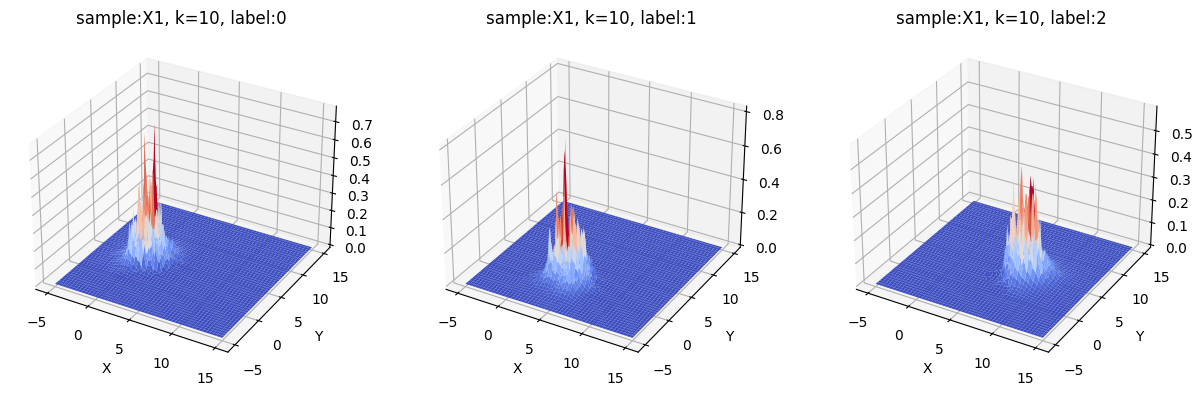

In [47]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1,projection='3d')
ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:0")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 2,projection='3d')
ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:1")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 3,projection='3d')
ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=10, label:2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [48]:
p2 = Kneibor_Eval(X1, 30)

X,Y = np.mgrid[-5:15:200j, -5:15:200j]

Z0 = p2[:, :, 0]
Z1 = p2[:, :, 1]
Z2 = p2[:, :, 2]

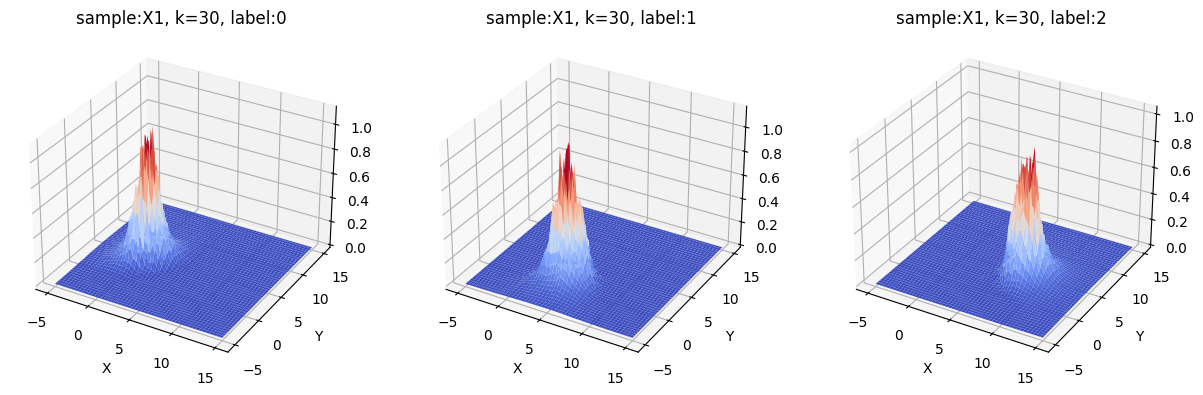

In [49]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1,projection='3d')
ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=30, label:0")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 2,projection='3d')
ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=30, label:1")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 3,projection='3d')
ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=30, label:2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [50]:
p3 = Kneibor_Eval(X1, 50)
X,Y = np.mgrid[-5:15:200j, -5:15:200j]

Z0 = p3[:, :, 0]
Z1 = p3[:, :, 1]
Z2 = p3[:, :, 2]

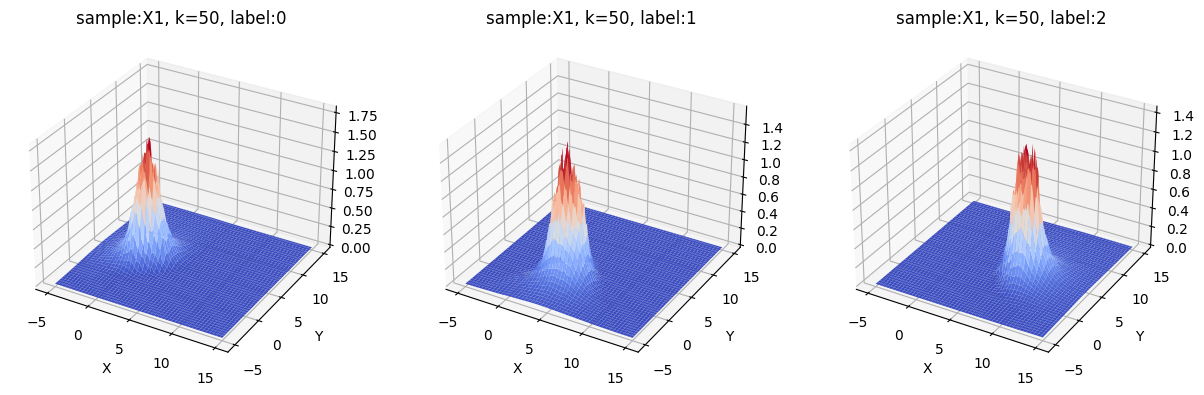

In [51]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 3, 1,projection='3d')
ax.plot_surface(X, Y, Z0,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=50, label:0")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 2,projection='3d')
ax.plot_surface(X, Y, Z1,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=50, label:1")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax = plt.subplot(1, 3, 3,projection='3d')
ax.plot_surface(X, Y, Z2,cmap=plt.cm.coolwarm)
ax.set_title("sample:X1, k=50, label:2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

## 感谢助教的细心教导。